# Lab 5 - Clustering (K-Means)
## Geleshko Dmytro
## 
## Theory
Кластерний аналіз (англ. Data clustering) — задача розбиття заданої вибірки об'єктів (ситуацій) на підмножини, які називаються кластерами, так, щоб кожен кластер складався з схожих об'єктів, а об'єкти різних кластерів істотно відрізнялися. Завдання кластеризації відноситься до статистичної обробки, а також до широкого класу завдань навчання без вчителя.
<hr>
Кластерний аналіз дозволяє скорочувати розмірність даних, робити її наочною.
Кластерний аналіз може застосовуватися до совокупностям часових рядів, тут можуть виділятися періоди схожості деяких показників і визначатися групи часових рядів зі схожою динамікою.
Кластерний аналіз паралельно розвивався в кількох напрямках, таких як біологія, психологія, ін., Тому у більшості методів існує по два і більше назв. Це істотно ускладнює роботу при використанні кластерного аналізу.
Завдання кластерного аналізу можна об'єднати в такі групи:

- Розробка типології або класифікації.
- Дослідження корисних концептуальних схем групування об'єктів.
- Подання гіпотез на основі дослідження даних.
- Перевірка гіпотез або досліджень для визначення, чи дійсно типи (групи), виділені тим чи іншим способом, присутні в наявних даних.

Методи кластерного аналізу можна розділити на дві групи:

- Ієрархічні.
- Неієрархічні.

<hr>

Неієрархічні методи мають за основу вже задану кількість кластерів (k-means, PAM кластеризація) або використовують складні алгоритми знаходження їх кількості (CLOPE, карти Кохонена)
Серед неієрархічних методів кластеризації особливої уваги заслуговують ітеративні методи. Вони працюють за наступним алгоритмом:

1. вихідні дані розбиваються на певну кількість кластерів та обчислюються центри тяжіння цих кластерів.
2. кожна точка даних поміщується в кластер з найближчим центром тяжіння.
3. обчислюються нові центри тяжіння кластерів; кластери не замінюються на нові доти, поки не будуть повністю переглянуті всі дані.
4. кроки 2 і 3 повторюються доти, поки не перестануть змінюватись кластери.

Ітерації за наведеним принципом полягають у приєднанні об’єктів до кластера з найближчим центром тяжіння. Кількість фінальних кластерів фіксована і задається до початку кластеризації. Перерахунок центру тяжіння кластера може здійснюватись як після кожної зміни його складу, так і після того, як буде завершено перегляд усіх даних. На сьогодні існує багато варіантів даного методу, що відрізняються особливостями роботи. До найбільш простих і ефективних алгоритмів кластеризації відноситься k-means, або в україномовному варіанті k-середніх, запропонований Г. Боллом і Д. Холлом у 1965 р.
## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

## Dataframe

In [2]:
df = pd.read_csv("06-wine.txt", sep="\t", index_col=False)
X = df.values
df

,cultivar,alcohol,malic-acid,ash,alcalinity-of-ash,magnesium,total-phenols,flavanoids,nonflavanoid-phenols,proanthocyanins,color-intensity,hue,optical-density,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Features

In [3]:
col_id = 0
for col in df.columns:
    print(col_id,"\t", col)
    col_id+=1

0 	 cultivar
1 	 alcohol
2 	 malic-acid
3 	 ash
4 	 alcalinity-of-ash
5 	 magnesium
6 	 total-phenols
7 	 flavanoids
8 	 nonflavanoid-phenols
9 	 proanthocyanins
10 	 color-intensity
11 	 hue
12 	 optical-density
13 	 proline


## Normalazing

In [4]:
X = normalize(X, axis=0, norm='max')

for i in range(X.shape[1]):
    print(X[:,i].min(), " - ", X[:,i].max())

0.3333333333333333  -  1.0
0.743762643290627  -  1.0
0.12758620689655173  -  1.0
0.4210526315789474  -  1.0
0.35333333333333333  -  1.0
0.43209876543209874  -  1.0
0.25257731958762886  -  1.0
0.06692913385826772  -  1.0
0.19696969696969696  -  1.0
0.11452513966480446  -  1.0
0.09846153846153846  -  1.0
0.2807017543859649  -  1.0
0.3175  -  1.0
0.16547619047619047  -  1.0


## Ploting

<module 'matplotlib.pyplot' from 'E:\\Programs\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

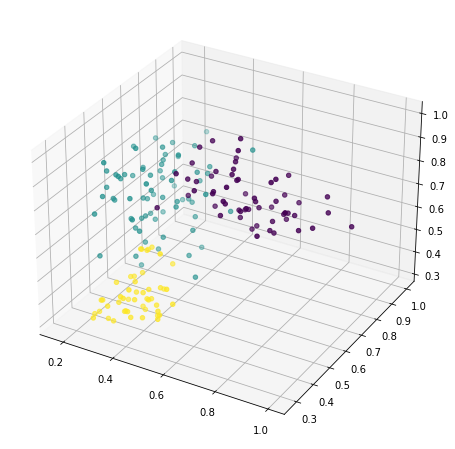

In [5]:
plt.rcParams["figure.figsize"] = (16,8)
plt.axes(projection='3d').scatter3D(X[:,13], X[:,11], X[:,12], c=X[:,0])
plt

## Searching The Number Of Clusters

In [6]:
def q3_score(X, cluster_labels):
    sum_of_dist =  0
    cluster_set = np.unique(cluster_labels)
    for i in range(len(cluster_set)):
        cluster_mask = cluster_labels[:] == cluster_set[i]
        sum_of_dist += pdist(X[cluster_mask,:], metric="sqeuclidean").sum()
    return sum_of_dist


inertia = []
disp = []

K = range(1, 16)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    clusters = kmeanModel.fit_predict(X)
    #inertia
    inertia.append(kmeanModel.inertia_)
    #sum of obj distances
    disp.append(q3_score(X, clusters))

E:\Programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Q2 (std)

<module 'matplotlib.pyplot' from 'E:\\Programs\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

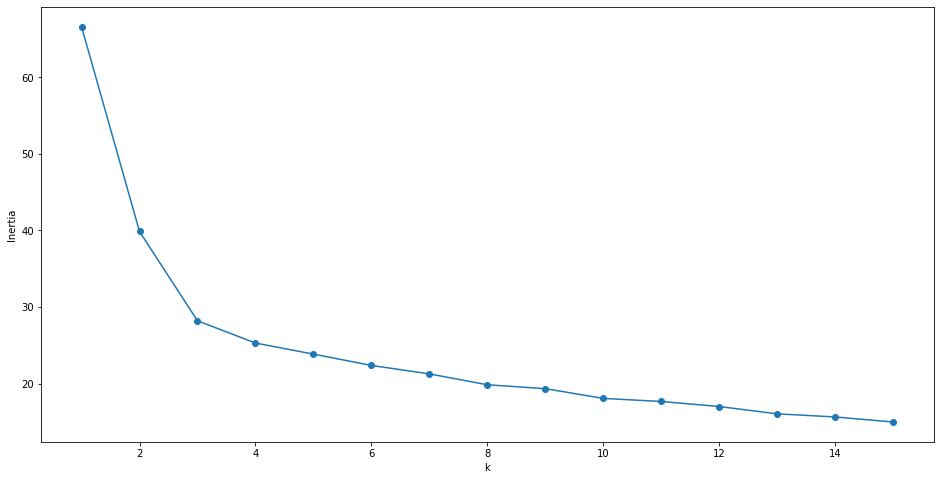

In [7]:
plt.plot(K, inertia, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt

### Q3

<module 'matplotlib.pyplot' from 'E:\\Programs\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

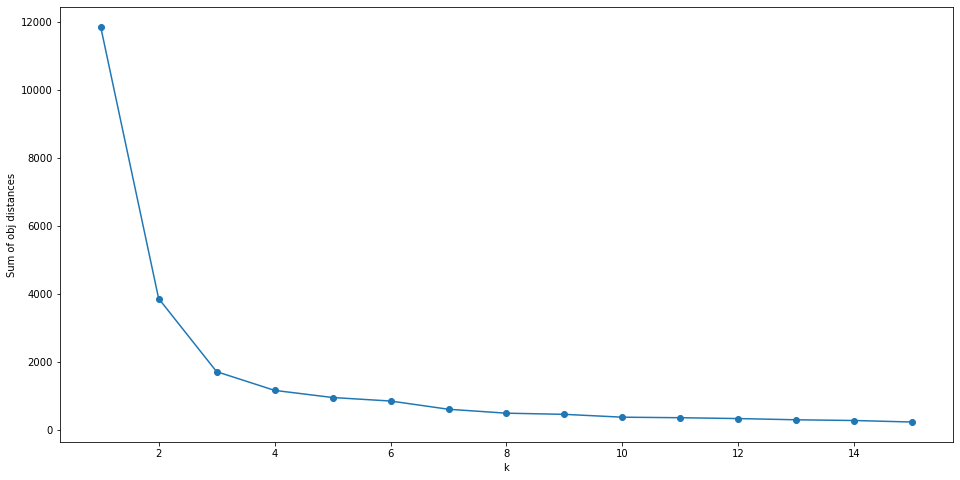

In [8]:
plt.plot(K, disp, 'o-')
plt.xlabel('k')
plt.ylabel('Sum of obj distances')
plt

## Clustering

In [9]:
kmeanModel = KMeans(n_clusters=4)
clusters = kmeanModel.fit_predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 1, 3,
       3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3,
       3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

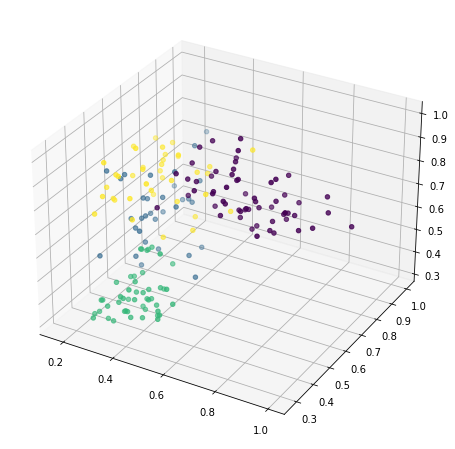

In [10]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,13], X[:,11], X[:,12], c=clusters)

### Centers

In [11]:
centers = kmeanModel.cluster_centers_
centers

array([[0.33333333, 0.92682035, 0.34666861, 0.76024558, 0.5679096 ,
        0.65641348, 0.73200245, 0.58708128, 0.43939394, 0.53053688,
        0.42525424, 0.62107246, 0.78944915, 0.66411421],
       [0.66666667, 0.82674477, 0.33033405, 0.7065596 , 0.684375  ,
        0.55555556, 0.48952964, 0.32062008, 0.68702652, 0.35265363,
        0.23182692, 0.62364766, 0.6196875 , 0.30678943],
       [1.        , 0.88696898, 0.57478448, 0.75451496, 0.71388889,
        0.61304012, 0.43266753, 0.15383038, 0.6780303 , 0.32221834,
        0.56894231, 0.39924464, 0.42088542, 0.374938  ],
       [0.66666667, 0.82896762, 0.33558798, 0.68548067, 0.6665812 ,
        0.60667933, 0.65820777, 0.48263679, 0.43939394, 0.53967913,
        0.24203156, 0.61283551, 0.75923077, 0.31123321]])

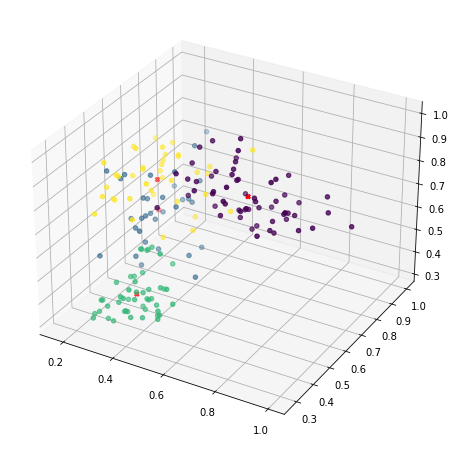

In [12]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,13], X[:,11], X[:,12], c=clusters)
ax.scatter3D(centers[:,13], centers[:,11], centers[:,12], c="red", marker="X")

### Q3 Score

In [13]:
q3_score(X, clusters)

1146.7503805678323

## Results

В результаті виконання лабораторної роботи було проаналізовано запропоновані дані за допомогою неієрархічних методів кластеризації, а саме метод K-Means. Після того як дані було завантажено, нормалізовано та зоображено на графі, було встановлено функцію оцінки для визначення кількості кластерів. За допомогою методу ліктя та оцінкою суми відстаней між об'єктами кластеру, було обрано k=4. Результуючий граф кластеризованих даних, центри та оцінка Q3 виведено на екран.